## MACHINE LEARNING 1,2,3,4,5 & 6##
 
#### MACHINE LEARNING 1 to 6: Assignment ####

### Problem Statement: Machine Learning 3

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

#### Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. 
 
Description of Variables 
 
The dataset contains 6366 observations of 9 variables: 
 
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) 
age: woman's age 
yrs_married: number of years married 
children: number of children 
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious) 
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above) 
affairs: time spent in extra-marital affairs
 
Code to loading data and modules:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data

2. add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \ religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
 
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3', 'C(occupation)[T.4.0]':'occ_4',  'C(occupation)[T.5.0]':'occ_5', 'C(occupation)[T.6.0]':'occ_6', 'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]':'occ_husb_3', 'C(occupation_husb)[T.4.0]':'occ_husb_4', 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 

y = np.ravel(y) 

In [1]:
# importing the required modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [2]:
# Data exploration
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [3]:
# On an average, women with affairs rate their marriage lower

In [4]:
# Let's take another look at the rate_marriage variable
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [5]:
# An increase in age, yrs_married, and children appears to correlate with a declining marriage rating

#### Data visualization

Text(0, 0.5, 'Frequency')

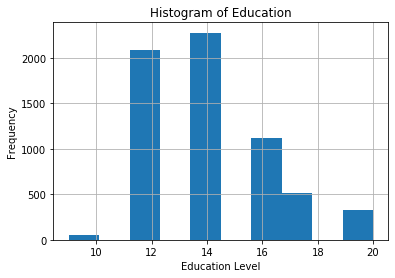

In [6]:
# show plots in the notebook
%matplotlib inline

#histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

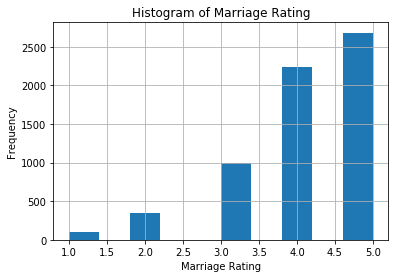

In [7]:
#histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [8]:
# Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

Text(0, 0.5, 'Frequency')

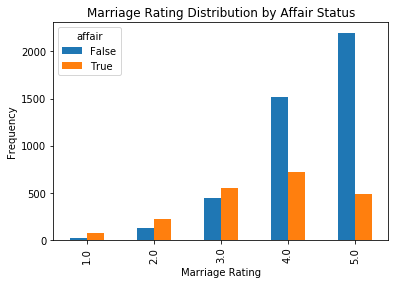

In [9]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [10]:
# Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

Text(0, 0.5, 'Percentage')

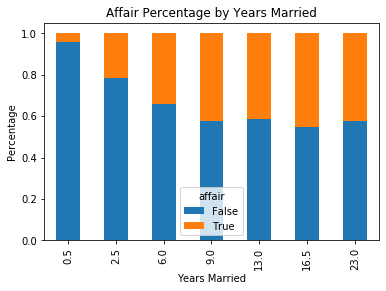

In [11]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

#### Prepare Data for Logistic Regression

To prepare the data, we will add an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. 
The dmatrices function from the patsy module can do that using formula language.

In [12]:
# create dataframes with an intercept column and dummy variables for occupationand occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


Let's rename the column names for the dummy variables

In [13]:
# rename column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3', 'C(occupation)[T.4.0]':'occ_4', 'C(occupation)[T.5.0]':'occ_5', 'C(occupation)[T.6.0]':'occ_6', 'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]':'occ_husb_3', 'C(occupation_husb)[T.4.0]':'occ_husb_4', 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [14]:
# We need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable
y = np.ravel(y)

In [15]:
# Let's run the logistic regression on th entire dataset
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on training set
model.score(X, y)

0.7258875274897895

#### Training set has 73% accuracy, let's check the null error rate

In [16]:
# what percentage had affairs?
y.mean()

0.3224945020420987

Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much.
Let's examine the coefficients to see what we learned

In [17]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


From the output, we can say - Increases in marriage rating and religiousness corresponds to a decrease in the likelihood of having an affair.

#### Model Evaluation

We have trained and tested on the same set. Let's split the data into a training set and a testing set.

In [18]:
# evaluate the model by splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's now predict class labels for the test set and also generate the class probabilities

In [19]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [20]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.
Now let's generate some evaluation metrics

In [21]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.745950606950631


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics

In [22]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



#### Model Evaluation Using Cross-Validation

Let's try 10-fold cross-validation to see if the accuracy holds up more rigorously.

In [23]:
# evaluate the model using 10 fold cross validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


Looks good. It's still performing at 73% accuracy, So our model is ready for prediction!

Can we predict the probability of an affair using our model?

Let's predict the probability of an affair for a random woman not present in the dataset.

Assume she's a 25-year-old house wife who is a graduate, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [24]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.77472221, 0.22527779]])

From our model we can predict that probability of an affair is 23%.

Let's predict the probability of an affair for a random woman not present in the dataset. She's a 30-year-old teacher who graduated college, has been married for 10 years, has 3 children, rates herself
as strongly religious, rates her marriage as fair, and her husband is a farmer

In [25]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4, 16]]))

array([[0.67998108, 0.32001892]])

From our model we can predict that probability of an affair is 32%.